<a href="https://colab.research.google.com/github/zhaoheng001/colabtogithubdemo/blob/master/GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import tensorflow as tf
# Importing some more libraries
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
h = 0.01
#save last pooling layer with a dim 512 vector 
all_images_data = pd.read_csv('active_all_flt.csv')
all_images_data = all_images_data.loc[:, 'label':'pixel512']
sample_class0 = all_images_data[all_images_data.label == 0]
sample_class1 = all_images_data[all_images_data.label == 1]
sample_class0 = sample_class0.loc[1:960]
sample_class1 = sample_class1.loc[1:1100]
frames = [sample_class0, sample_class1]
sample200 = pd.concat(frames)

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

sample200 = shuffle(sample200)
sample200.index = range(len(sample200))
sample_x = sample200.loc[:, 'pixel1':'pixel512']
sample_y = sample200.loc[:, 'label']
sample_x = sample_x.values
#sample_y = tf.to_int32(sample_y, name='ToInt32')
#to one hot
sample_y_list = list(sample_y)
sample_y_int = map(int, sample_y_list)
sample_y_binary = tf.one_hot(sample_y_int, depth=2)
with tf.Session() as sess:
    sample_y_bi = sess.run(sample_y_binary)

    
num_epoch = 200
det_w = np.zeros((num_epoch))
Acc = np.zeros((num_epoch))
pred_label = np.zeros((200))
def accuracy(Input_x,Input_y,weights):
    accnum = 0
    for i in range(200):
        Hidn_node0 = np.zeros((202))
        Hidn_node1 = np.zeros((202))
        Hidn_node2 = np.zeros((202))
        Hidn_node3 = np.zeros((202))
        Hidn_node4 = np.zeros((202))
        Hidn_node5 = np.zeros((202))
        In_node = Input_x[i]
        #Hid_inil = np.random.randint(0,2,(202))
        Threshold = [1]
        allnode = np.hstack((In_node,Hidn_node0))
        allnode = np.hstack((allnode,Threshold))
        for j in range(202):
            Hidn_nd = np.dot(weights[j+512], allnode)
            Hidn_nd = 1.0/(1.0+math.exp(-Hidn_nd))
            p = np.array([1.0 - Hidn_nd, Hidn_nd])
            Hidn_node1[j] = np.random.choice([0, 1], p = p.ravel())
            #Hidn_node1 = Hid_inil
        
        
        allnode = np.hstack((In_node,Hidn_node1))  
        allnode = np.hstack((allnode,Threshold))
        for j in range(202):
            Hidn_nd = np.dot(weights[j+512], allnode)
            Hidn_nd = 1.0/(1.0+math.exp(-Hidn_nd))
            p = np.array([1.0 - Hidn_nd, Hidn_nd])
            Hidn_node2[j] = np.random.choice([0, 1], p = p.ravel())
            #Hidn_node2 = Hid_inil
            
        allnode = np.hstack((In_node,Hidn_node2))  
        allnode = np.hstack((allnode,Threshold))
        for j in range(202):
            Hidn_nd = np.dot(weights[j+512], allnode)
            Hidn_nd = 1.0/(1.0+math.exp(-Hidn_nd))
            p = np.array([1.0 - Hidn_nd, Hidn_nd])
            Hidn_node3[j] = np.random.choice([0, 1], p = p.ravel())
            #Hidn_node3 = Hid_inil
            
            
        allnode = np.hstack((In_node,Hidn_node3))  
        allnode = np.hstack((allnode,Threshold))
        for j in range(202):
            Hidn_nd = np.dot(weights[j+512], allnode)
            Hidn_nd = 1.0/(1.0+math.exp(-Hidn_nd))
            p = np.array([1.0 - Hidn_nd, Hidn_nd])
            Hidn_node4[j] = np.random.choice([0, 1], p = p.ravel())
            #Hidn_node4 = Hid_inil
            
            
        allnode = np.hstack((In_node,Hidn_node4))  
        allnode = np.hstack((allnode,Threshold))
        for j in range(202):
            Hidn_nd = np.dot(weights[j+512], allnode)
            Hidn_nd = 1.0/(1.0+math.exp(-Hidn_nd))
            p = np.array([1.0 - Hidn_nd, Hidn_nd])
            Hidn_node5[j] = np.random.choice([0, 1], p = p.ravel())
            #Hidn_node5 = Hid_inil
        
            
            
        allnode = np.hstack((In_node,Hidn_node5))  
        allnode = np.hstack((allnode,Threshold))
        pred_outnod1 = np.dot(weights[712], allnode)
        pred_outnod1 = 1.0/(1.0+math.exp(-pred_outnod1))
        
        pred_outnod2 = np.dot(weights[713], allnode)
        pred_outnod2 = 1.0/(1.0+math.exp(-pred_outnod2))
        
        prob1 = pred_outnod1/(pred_outnod1 + pred_outnod2)
        prob2 = pred_outnod2/(pred_outnod1 + pred_outnod2)
        pred_y = [prob1, prob2]
        
        
        #pred_y = Hidn_node5[200:202]
        pred_y = np.argmax(pred_y)
        pred_label[i] = pred_y
        real_y = np.argmax(Input_y[i])
        if pred_y == real_y:
            accnum = accnum + 1
    acc = accnum/(200.0)
    return acc
            
    

    
def train(In, Out, epoch):
    h = 0.01
    weight_ini = np.random.random(size=(715,715))-0.5
    w = (weight_ini + weight_ini.T)/2
    for i in range(512):
        for j in range(512):
            w[i][j] = 0
    for i in range(512,712):
        for j in range(512,712):
            w[i][j] = 0
    for i in range(712,714):
        for j in range(712,714):
            w[i][j] = 0
    for i in range(512):
        for j in range(712,715):
            w[i][j] = 0
    for i in range(712,715):
        for j in range(512):
            w[i][j] = 0
        #w[j][i] = 0
    w[714][714] = 0
    #M_inil = np.zeros((200,715,715))
    M = np.zeros((715,715))
    
    for i in range(epoch):
        
        for j in range(200):
            Hidn_node0 = np.zeros((200))
            Hidn_node1 = np.zeros((200))
            Hidn_node2 = np.zeros((200))
            Hidn_node3 = np.zeros((200))
            #Hid_inil = np.random.randint(0,2,(200))
            In_node = In[j]
            #Hid_node = Hid[j]
            #Hid_inil = np.random.randint(0,2,(200))
            Out_node = Out[j]
            Threshold = [1]
            allnode = np.hstack((In_node,Hidn_node0))  
            allnode = np.hstack((allnode,Out_node))
            allnode = np.hstack((allnode,Threshold))
            
            #initial Hidden layer for each input
            
            for k in range(200):
                Hidn_nd = np.dot(w[k+512], allnode)
                Hidn_nd = 1.0/(1.0+math.exp(-Hidn_nd))
                p = np.array([1.0 - Hidn_nd, Hidn_nd])
                
                Hidn_node1[k] = np.random.choice([0, 1], p = p.ravel())
                #Hidn_node1 = Hid_inil
            
            allnode = np.hstack((In_node,Hidn_node1))  
            allnode = np.hstack((allnode,Out_node))
            allnode = np.hstack((allnode,Threshold))
                
            for k in range(200):     
                Hidn_nd = np.dot(w[k+512], allnode)
                Hidn_nd = 1.0/(1.0+math.exp(-Hidn_nd))
                p = np.array([1.0 - Hidn_nd, Hidn_nd])
                
                Hidn_node2[k] = np.random.choice([0, 1], p = p.ravel())
                #Hidn_node2 = Hid_inil
                
          
            allnode = np.hstack((In_node,Hidn_node2))  
            allnode = np.hstack((allnode,Out_node))
            allnode = np.hstack((allnode,Threshold))
        
            for k in range(200):     
                Hidn_nd = np.dot(w[k+512], allnode)
                Hidn_nd = 1.0/(1.0+math.exp(-Hidn_nd))
                p = np.array([1.0 - Hidn_nd, Hidn_nd])
                
                Hidn_node3[k] = np.random.choice([0, 1], p = p.ravel())
                #Hidn_node3 = Hid_inil
                
                
            clp = np.zeros((715,715))
            for l in range(512,712):
                for m in range(512):
                    clp[l][m] = np.dot(Hidn_node1[l-512], In_node[m]) + np.dot(Hidn_node2[l-512], In_node[m]) + np.dot(Hidn_node3[l-512], In_node[m])
                for m in range(712,714):
                    clp[l][m] = np.dot(Hidn_node1[l-512], Out_node[m-712]) + np.dot(Hidn_node2[l-512], Out_node[m-712]) +np.dot(Hidn_node3[l-512], Out_node[m-712])
                clp[l][714] = Hidn_node1[l-512] + Hidn_node2[l-512] + Hidn_node3[l-512]
            clp = clp + clp.T
              
            
            
            
            #initial Hidden layer for each input
            #Hid_inil = np.random.randint(0,2,(202))
            Hidn_node0 = np.zeros((202))
            Hidn_node1 = np.zeros((202))
            Hidn_node2 = np.zeros((202))
            Hidn_node3 = np.zeros((202))
            allnode = np.hstack((In_node,Hidn_node0))  
            allnode = np.hstack((allnode,Threshold))
            for k in range(202):
                Hidn_nd = np.dot(w[k+512], allnode)
                Hidn_nd = 1.0/(1.0+math.exp(-Hidn_nd))
                p = np.array([1.0 - Hidn_nd, Hidn_nd])
                
                Hidn_node1[k] = np.random.choice([0, 1], p = p.ravel())
                #Hidn_node1 = Hid_inil
                
            allnode = np.hstack((In_node,Hidn_node1))  
            allnode = np.hstack((allnode,Threshold))
                
            for k in range(202):     
                Hidn_nd = np.dot(w[k+512], allnode)
                Hidn_nd = 1.0/(1.0+math.exp(-Hidn_nd))
                p = np.array([1.0 - Hidn_nd, Hidn_nd])
                
                Hidn_node2[k] = np.random.choice([0, 1], p = p.ravel())
                #Hidn_node2 = Hid_inil
                
          
            allnode = np.hstack((In_node,Hidn_node2))  
            allnode = np.hstack((allnode,Threshold))
        
            for k in range(202):     
                Hidn_nd = np.dot(w[k+512], allnode)
                Hidn_nd = 1.0/(1.0+math.exp(-Hidn_nd))
                p = np.array([1.0 - Hidn_nd, Hidn_nd])
                
                Hidn_node3[k] = np.random.choice([0, 1], p = p.ravel())
                #Hidn_node3 = Hid_inil
        
        
            unclp = np.zeros((715,715))
            for l in range(512,712):
                for m in range(512):
                    unclp[l][m] = np.dot(Hidn_node1[l-512], In_node[m]) + np.dot(Hidn_node2[l-512], In_node[m]) + np.dot(Hidn_node3[l-512], In_node[m])
                for m in range(712,714):
                    unclp[l][m] = np.dot(Hidn_node1[l-512], Out_node[m-712]) + np.dot(Hidn_node2[l-512], Out_node[m-712]) +np.dot(Hidn_node3[l-512], Out_node[m-712])
                unclp[l][714] = Hidn_node1[l-512] + Hidn_node2[l-512] + Hidn_node3[l-512]
            unclp = unclp + unclp.T
            
            
            M0 = clp - unclp
            M = M + M0
        M = M/(200.0)
        det_w[i] = np.linalg.norm(M,ord=2)
        print(det_w[i])
        w = w + h*M
        Accuracy = accuracy(In, Out, w)
        Acc[i] = Accuracy
        print(Accuracy)

In [54]:
train(sample_x, sample_y_bi, 100)

21.18955874505715
0.49
20.86567959664224
0.475
20.01961546616175
0.47
22.458285022907752
0.465
19.658827851712683
0.51
20.14221585588083
0.525
21.12088073247205
0.535
19.950477265930783
0.51
21.56514916000823
0.535
22.65114639924868
0.52
19.32960778296128
0.55
19.06045792415945
0.545
20.547434064408836
0.575
18.299920234811168
0.57
23.6678385723629
0.6
19.64917742157862
0.635
18.6351108776119
0.63
19.79230135373503
0.61
19.584111317226924
0.61
19.386760055000163
0.67
20.55339704709497
0.655
22.696312859832666
0.655
17.59846479377067
0.69
19.317876389728355
0.695
18.37661759208853
0.685
20.288399940488347
0.71
18.07904840323861
0.675
18.01490763127943
0.72
18.69059967075883
0.69
19.71212303094153
0.73
17.559460252031112
0.75
17.856233805980782
0.735
19.349562242315077
0.745
19.42630931568513
0.735
18.9950874758594
0.735
18.241533384404892
0.715
18.378826573267023
0.725
17.928001912648103
0.755
18.35823674340507
0.725
18.425707966919923
0.74
18.657163898935497
0.72
19.16244438204893
0.73

Text(0,0.5,'Accuracy')

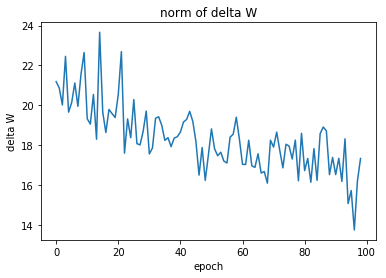

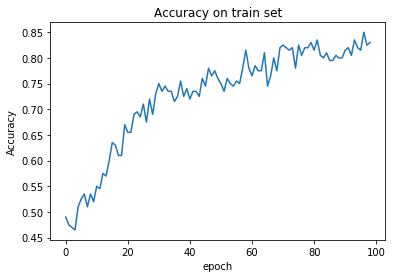

In [58]:
det_w = det_w[0:99]
plt.figure()
plt.title('norm of delta W')
plt.plot(det_w)
plt.xlabel("epoch")
plt.ylabel("delta W")

Acc = Acc[0:99]
plt.figure()
plt.title('Accuracy on train set')
plt.plot(Acc)
plt.xlabel("epoch")
plt.ylabel("Accuracy")

[[0.72 0.28]
 [0.14 0.86]]


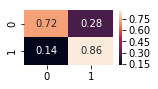

In [59]:
import seaborn as sn
confu_mat = confusion_matrix(sample_y, pred_label)
confu_mat = confu_mat/100.0
print(confu_mat)
confu_mat = pd.DataFrame(confu_mat, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (2,1))
sn.heatmap(confu_mat, annot=True)

